# Visualizations

This notebook is used to visualize the results of the genetic algorithm. The results are optionally stored in the `results` folder.

In [1]:
# Project's [example](https://github.com/ahmedfgad/GeneticAlgorithmPython/tree/3.3.1?tab=readme-ov-file#example) on GitHub

import pygad
import numpy
import matplotlib.pyplot as plt
from pathlib import Path

%load_ext autoreload
%autoreload 2

save_figures = True
output_folder: Path = Path('results')

"""
Given the following function:
    y = f(w1:w6) = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + 6wx6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7) and y=44
What are the best values for the 6 weights (w1 to w6)? We are going to use the genetic algorithm to optimize this function.
"""

function_inputs = [4,-2,3.5,5,-11,-4.7] # Function inputs.
desired_output = 44 # Function output.

def fitness_func(ga_instance, solution, solution_idx):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function calulates the sum of products between each input and its corresponding weight.
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / numpy.abs(output - desired_output)
    return fitness

fitness_function = fitness_func

num_generations = 100 # Number of generations.
num_parents_mating = 7 # Number of solutions to be selected as parents in the mating pool.

# To prepare the initial population, there are 2 ways:
# 1) Prepare it yourself and pass it to the initial_population parameter. This way is useful when the user wants to start the genetic algorithm with a custom initial population.
# 2) Assign valid integer values to the sol_per_pop and num_genes parameters. If the initial_population parameter exists, then the sol_per_pop and num_genes parameters are useless.
sol_per_pop = 50 # Number of solutions in the population.
num_genes = len(function_inputs)

last_fitness = 0
def callback_generation(ga_instance):
    
    global last_fitness
    print(f"Generation = {ga_instance.generations_completed}")
    print(f"Fitness    = {ga_instance.best_solution()[1]}")
    print(f"Change     = {ga_instance.best_solution()[1] - last_fitness}")
    last_fitness = ga_instance.best_solution()[1]
    
# Create a timeit wrapper


# Creating an instance of the GA class inside the ga module. Some parameters are initialized within the constructor.
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating, 
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop, 
                       num_genes=num_genes,
                       on_generation=callback_generation,
                       save_solutions=True,
                       save_best_solutions=False,
                       gene_names=['w1', 'w2', 'w3', 'w4', 'w5', 'w6'],)

# Running the GA to optimize the parameters of the function.
ga_instance.run()

/home/jmserrano/development/GeneticAlgorithmPython/pygad/pygad.py:745: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(
/home/jmserrano/development/GeneticAlgorithmPython/pygad/pygad.py:1180: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.")


Generation = 1
Fitness    = 5.971717848127223
Change     = 5.971717848127223
Generation = 2
Fitness    = 8.687103095457633
Change     = 2.7153852473304108
Generation = 3
Fitness    = 8.687103095457633
Change     = 0.0
Generation = 4
Fitness    = 8.687103095457633
Change     = 0.0
Generation = 5
Fitness    = 8.687103095457633
Change     = 0.0
Generation = 6
Fitness    = 13.516027064438056
Change     = 4.828923968980423
Generation = 7
Fitness    = 13.516027064438056
Change     = 0.0
Generation = 8
Fitness    = 213.6716754941211
Change     = 200.15564842968305
Generation = 9
Fitness    = 213.6716754941211
Change     = 0.0
Generation = 10
Fitness    = 213.6716754941211
Change     = 0.0
Generation = 11
Fitness    = 213.6716754941211
Change     = 0.0
Generation = 12
Fitness    = 213.6716754941211
Change     = 0.0
Generation = 13
Fitness    = 3952.8438783192983
Change     = 3739.172202825177
Generation = 14
Fitness    = 3952.8438783192983
Change     = 0.0
Generation = 15
Fitness    = 3952.843

## Fitness evolution and new solution rate over generations

Figure saved to results/new_sol_rate


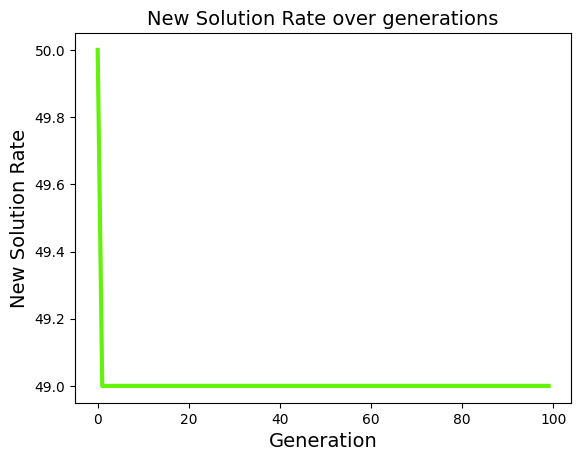

Figure saved to results/fitness
/tmp/ipykernel_25152/1541053538.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


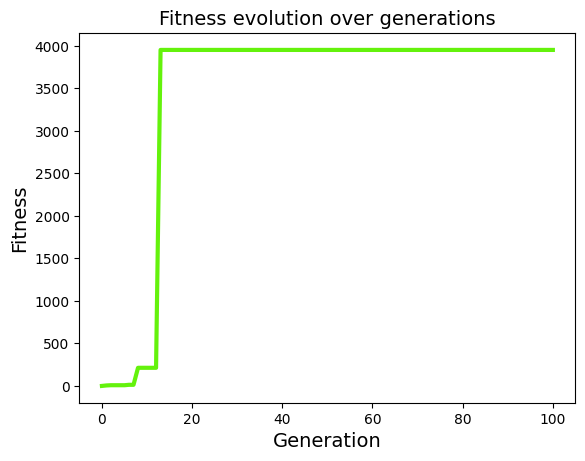

In [9]:
# New parameter `show_plot`
ga_instance.plot_new_solution_rate(save_dir=output_folder/"new_sol_rate" if save_figures else None);

fig = ga_instance.plot_fitness(show_plot=False, save_dir=output_folder/"fitness" if save_figures else None)
fig.show()

## Embedding

/tmp/ipykernel_25152/2639261774.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


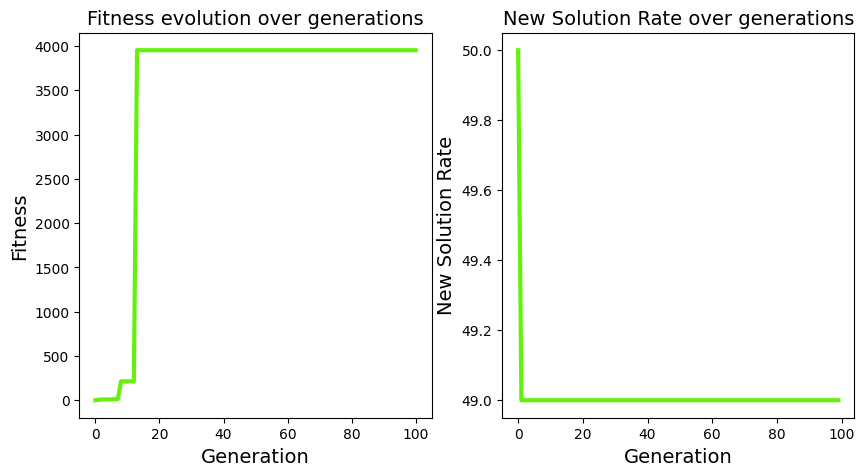

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

ga_instance.plot_fitness(show_plot=False, ax=axs[0])
ga_instance.plot_new_solution_rate(show_plot=False, ax=axs[1])

if save_figures:
    plt.savefig(fname=output_folder/"embedded.png", bbox_inches='tight')

fig.show()

## Genes evolution visualization 

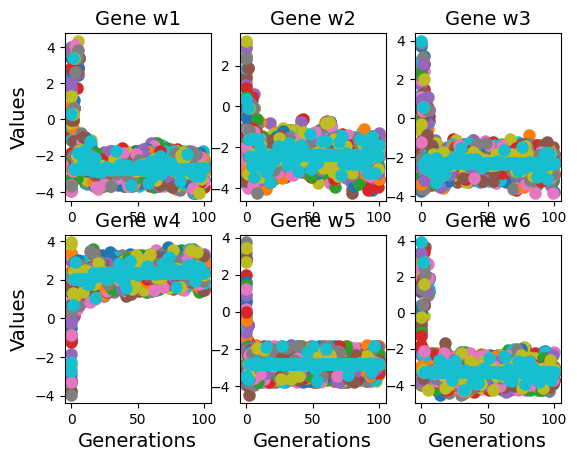

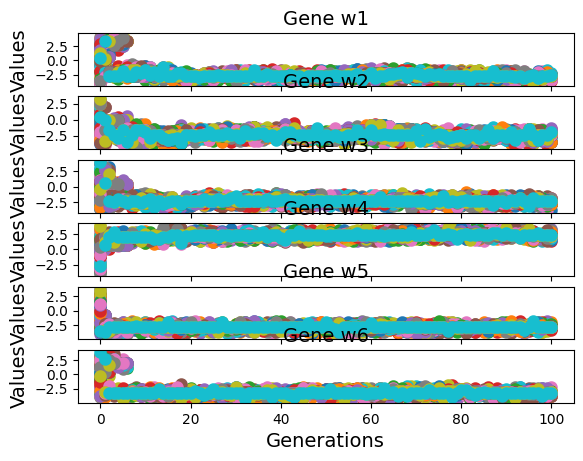

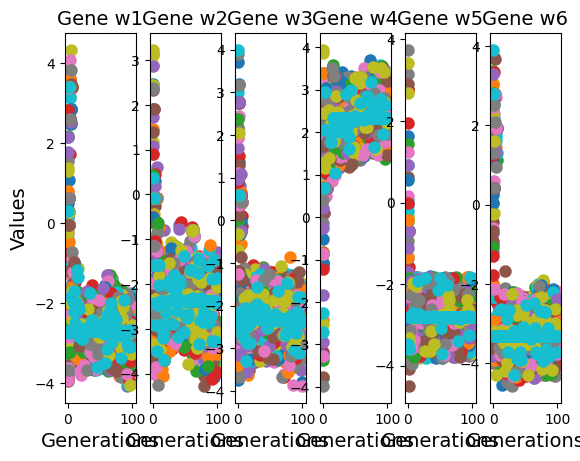

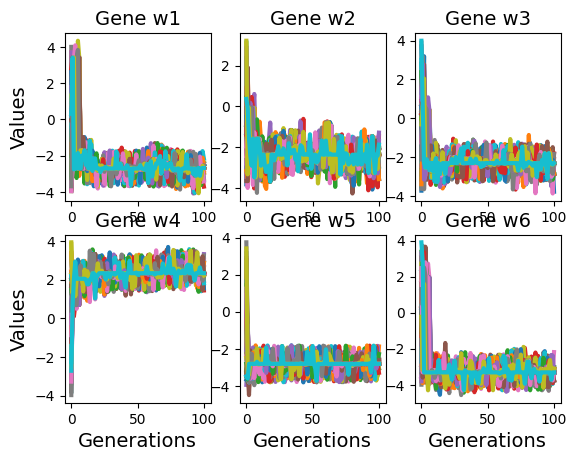

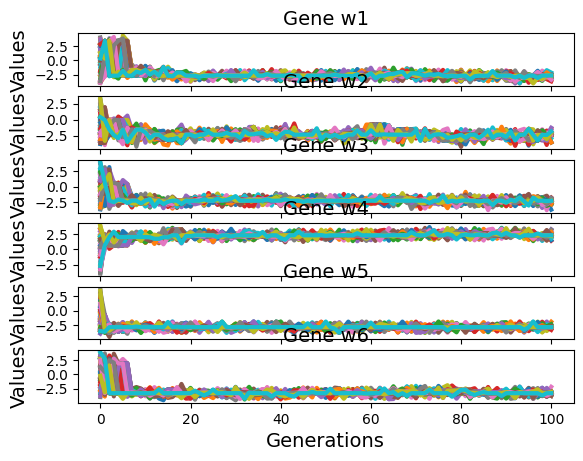

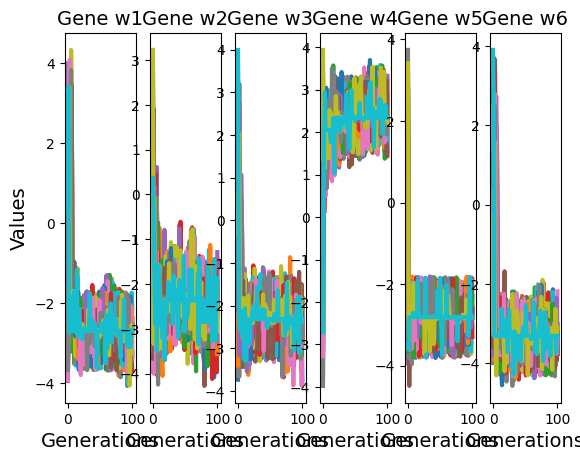

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (101,) and arg 1 with shape (101, 6).

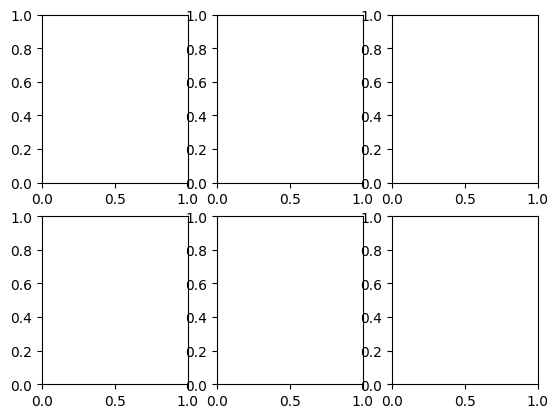

In [12]:
options_to_evaluate = [
    {"plot_type": "scatter", "graph_type": "plot", "figure_layout": "compact"},
    {"plot_type": "scatter", "graph_type": "plot", "figure_layout": "vertical_distribution"},
    {"plot_type": "scatter", "graph_type": "plot", "figure_layout": "horizontal_distribution"},
    {"plot_type": "plot", "graph_type": "plot", "figure_layout": "compact"},
    {"plot_type": "plot", "graph_type": "plot", "figure_layout": "vertical_distribution"},
    {"plot_type": "plot", "graph_type": "plot", "figure_layout": "horizontal_distribution"},
    {"plot_type": "bar", "graph_type": "plot", "figure_layout": "compact"},
    {"plot_type": "bar", "graph_type": "plot", "figure_layout": "vertical_distribution"},
    {"plot_type": "bar", "graph_type": "plot", "figure_layout": "horizontal_distribution"},
    {"graph_type": "boxplot"},
    {"graph_type": "histogram"},
]

for option in options_to_evaluate:
    
    option_key = "_".join(option.values())
    option.update({"save_dir": output_folder/option_key} if save_figures else {})
    
    ga_instance.plot_genes(**option);

## Grouped plot

ValueError: cannot reshape array of size 1 into shape (6,1)

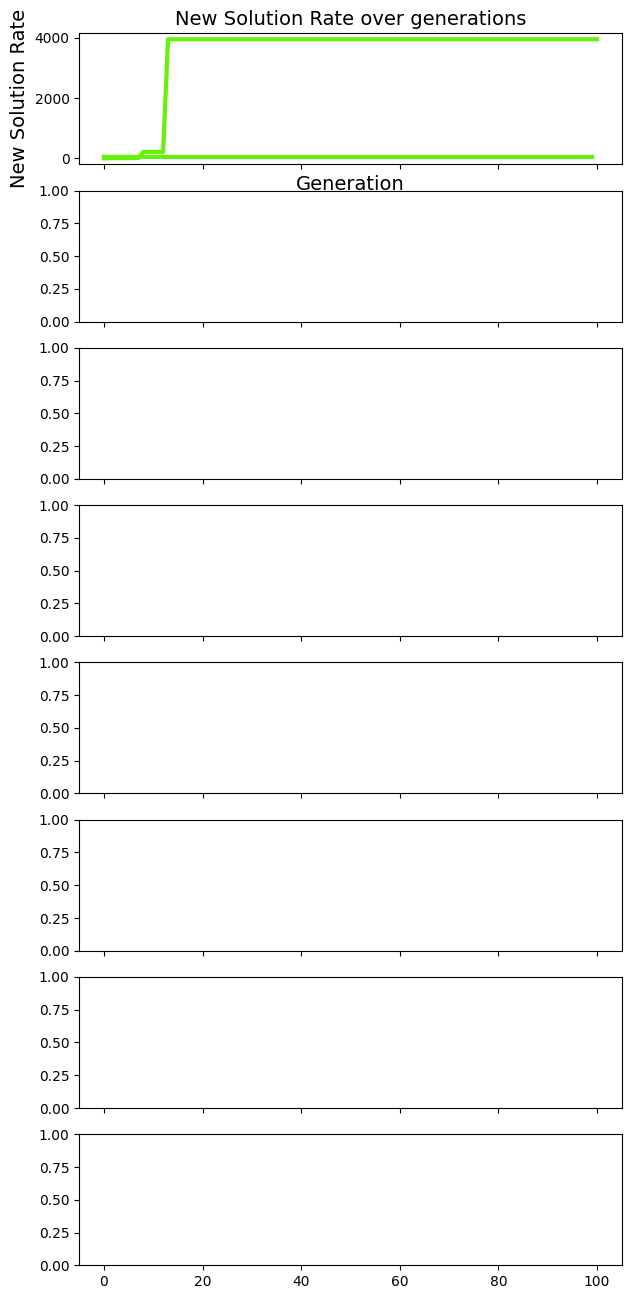

In [13]:
ga_instance.grouped_plot(figure_layout="vertical", save_dir=output_folder/"grouped_plot_vertical" if save_figures else None);
ga_instance.grouped_plot(figure_layout="horizontal", save_dir=output_folder/"grouped_plot_horizontal" if save_figures else None);